In [2]:
#importing necessary packages
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

#Scikit Gaussian Process functions
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, RBF, Exponentiation, Product, ConstantKernel as C, RationalQuadratic as RQ, Matern, WhiteKernel

#Scikit MultiOutput Regression class
from sklearn.multioutput import MultiOutputRegressor

#Scikit Metrics for manual R^2 score
from sklearn.metrics import r2_score

In [5]:
#load in input training data
emsp_train = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\em_sample_points200.npy") #set of sample parameter
#load in output training data
gal_Mstar_train = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_Mstar_200.npy")
gal_FeH_mean_train = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_mean_200.npy")
gal_FeH_std_train = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_std_200.npy")

#load in input testing data
emsp_test = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\em_sample_points10000.npy") #set of sample parameter
#load in output testing data
gal_Mstar_test = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_Mstar_10000.npy")
gal_FeH_mean_test = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_mean_10000.npy")
gal_FeH_std_test = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_std_10000.npy")

In [349]:
sigma_train = np.zeros(len(gal_Mstar_train[0])) 
em_Mstar = []
em_Mstar_pred = np.zeros([len(gal_Mstar_test),len(gal_Mstar_test[0])])
em_Mstar_pred_std = np.zeros([len(gal_Mstar_test),len(gal_Mstar_test[0])])

#Stellar mass emulators
for i in range(len(gal_Mstar_train[0])):
    sigma_train[i] = np.std(gal_Mstar_train[:,i])
    #print(sigma_train[i])
    kern = C(sigma_train[i]**2) * RBF() * C(sigma_train[i]**2) * RQ() 
    em_Mstar.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_Mstar[i].fit(emsp_train,gal_Mstar_train[:,i])
    em_Mstar_pred[:,i], em_Mstar_pred_std[:,i] = em_Mstar[i].predict(emsp_test, return_std = True)

In [351]:
#test predictions
print(em_Mstar_pred_std.max())
for i in range(len(gal_Mstar_train[0])):
    print("Test sample " + str(i) + " : R^2 - "+ str(em_Mstar[i].score(emsp_test, gal_Mstar_test[:,i]))+ ", LML:" + str(em_Mstar[i].log_marginal_likelihood())) #Test R^2
    print(r2_score(gal_Mstar_test[:,i], em_Mstar_pred[:,i]))
    #print("Dataset sigma: " + str(sigma_train[0]) + " vs " + str(em_Mstar_pred_std[:,0]))
#print()

#print(em_Mstar)
#print(x.shape)
#print(emsp_train.shape)
#print(emsp_test.shape)
#print(em_Mstar.score(emsp_train, gal_Mstar_train)) #GP models inherently match all the sample points

99049.3374277066
Test sample 0 : R^2 - 0.43367774747945104, LML:-2969002210.583008
0.433677747479451
Test sample 1 : R^2 - 0.33322323085662675, LML:-2698273.5263284566
0.33322323085662675
Test sample 2 : R^2 - 0.35041049868739327, LML:-3686239.773057391
0.35041049868739327
Test sample 3 : R^2 - 0.35360764413834256, LML:-34849759.39817489
0.35360764413834256
Test sample 4 : R^2 - 0.29809720480352186, LML:-55723813.99574626
0.29809720480352186
Test sample 5 : R^2 - 0.291586948654458, LML:-196800236.75616992
0.291586948654458
Test sample 6 : R^2 - 0.4497093325907001, LML:-15060163462.476727
0.4497093325907001
Test sample 7 : R^2 - 0.32920734739349666, LML:-973615045.9432434
0.32920734739349666
Test sample 8 : R^2 - 0.41203376916246237, LML:-4981053695.133291
0.41203376916246237
Test sample 9 : R^2 - 0.3010807246065722, LML:-639927.5133382179
0.3010807246065722
Test sample 10 : R^2 - 0.32888638143902005, LML:-169561956.428562
0.32888638143902005
Test sample 11 : R^2 - 0.3262115298781225, L

<IPython.core.display.Javascript object>


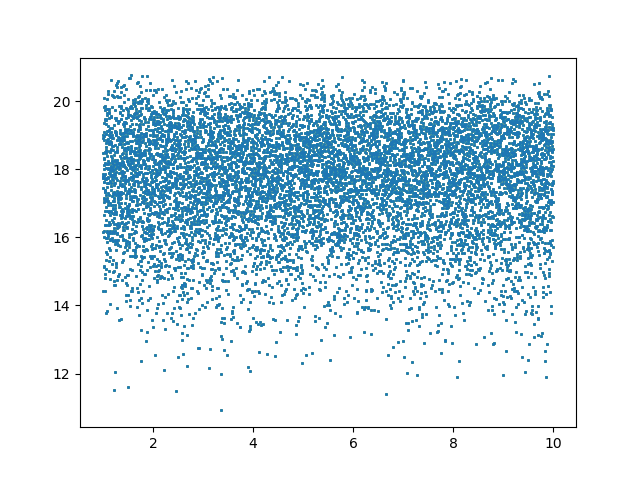

In [134]:
sigma_train = np.zeros(len(gal_FeH_mean_train[0]))
em_FeH_mean = []
em_FeH_mean_pred = np.zeros([len(gal_FeH_mean_test),len(gal_FeH_mean_test[0])])
em_FeH_mean_pred_std = np.zeros([len(gal_FeH_mean_test),len(gal_FeH_mean_test[0])])
#print(gal_FeH_mean_train[:,i].shape)

#Metallicity emulators                          
for i in range(len(gal_FeH_mean_train[0])):
    sigma_train[i] = np.std(gal_FeH_mean_train[:,i])
    #print(sigma_train[i])
    kern = C(sigma_train[i]**2) * RBF() * PairwiseKernel()
    em_FeH_mean.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_FeH_mean[i].fit(emsp_train,gal_FeH_mean_train[:,i])
    em_FeH_mean_pred[:,i], em_FeH_mean_pred_std[:,i] = em_FeH_mean[i].predict(emsp_test, return_std = True)

In [431]:
r_2 = 0
for i in range((len(gal_FeH_mean_train[0])-1)):
    print("Test sample " + str(i) + " : R^2 - "+ str(em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i]))+ ", LML:" + str(em_FeH_mean[i].log_marginal_likelihood())) #Test R^2
    r_2 += em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i])

r_2 = r_2 / (len(gal_FeH_mean_train[0])-1)
print(r_2)

Test sample 0 : R^2 - 0.6708651831724557, LML:-113.76593247480035
Test sample 1 : R^2 - 0.5055506259522262, LML:-220.35194337296232
Test sample 2 : R^2 - 0.595130621815205, LML:-246.85930627712187
Test sample 3 : R^2 - 0.6894685420150777, LML:-182.86426718706235
Test sample 4 : R^2 - 0.7767304117914092, LML:-203.3130275244011
Test sample 5 : R^2 - 0.6407576244546436, LML:-208.06245106045193
Test sample 6 : R^2 - 0.3038182355476774, LML:-66.02474266857394
Test sample 7 : R^2 - 0.7521850758640126, LML:-170.47128950923747
Test sample 8 : R^2 - 0.7260014513929517, LML:-119.45140920958508
Test sample 9 : R^2 - 0.6022108358180414, LML:-241.20979377655027
Test sample 10 : R^2 - 0.758469337701482, LML:-163.76120436970086
Test sample 11 : R^2 - 0.6730027065613036, LML:-154.29188785238824
Test sample 12 : R^2 - 0.6635867134551173, LML:-139.50932162502886
Test sample 13 : R^2 - 0.6746698173151875, LML:-232.82449344932445
Test sample 14 : R^2 - 0.5660061446982572, LML:-139.73910720683529
Test samp

In [8]:
#print(prev_R_score_F)
LML_cnt = 0
R_cnt = 0 
for i in range(len(gal_FeH_mean_train[0])):
    print("Test sample " + str(i) + " : R^2 - "+ str(em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i])) + ", LML:" + str(em_FeH_mean[i].log_marginal_likelihood())) #Test R^2
    if em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i])-prev_R_score_F[i] > 0:
        print("R^2 increase")
        R_cnt += 1
    else:
        print("R^2 decrease")
    if em_FeH_mean[i].log_marginal_likelihood()-prev_LML_score_F[i] > 0:
        print("LML increase")
        LML_cnt += 1 
    else:
        print("LML decrease")
    #print((em_FeH_mean_pred[:,20]-gal_FeH_mean_test[:,20]).mean())
print(R_cnt)
print(LML_cnt)

Test sample 0 : R^2 - 0.6708651831724557, LML:-113.76593247480035


NameError: name 'prev_R_score_F' is not defined

In [ ]:
prev_R_score_F = []
prev_LML_score_F = []
for i in range(len(gal_Mstar_train[0])):
    prev_R_score_F.append(em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i]))
    prev_LML_score_F.append(em_FeH_mean[i].log_marginal_likelihood())

In [ ]:
'''
#FeH_std emulator
kern = Matern()
# to set number of jobs to the number of cores, use n_jobs=-1
em_FeH_std = MultiOutputRegressor(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
em_FeH_std.fit(emsp_train,gal_FeH_std_train)
#test prediction
em_FeH_std_pred = em_FeH_std.predict(emsp_test)

print(em_FeH_std.score(emsp_train, gal_FeH_std_train)) #GP models inherently match all the sample points
print(em_FeH_std.score(emsp_test,gal_FeH_std_test)) #R^2
'''

<IPython.core.display.Javascript object>


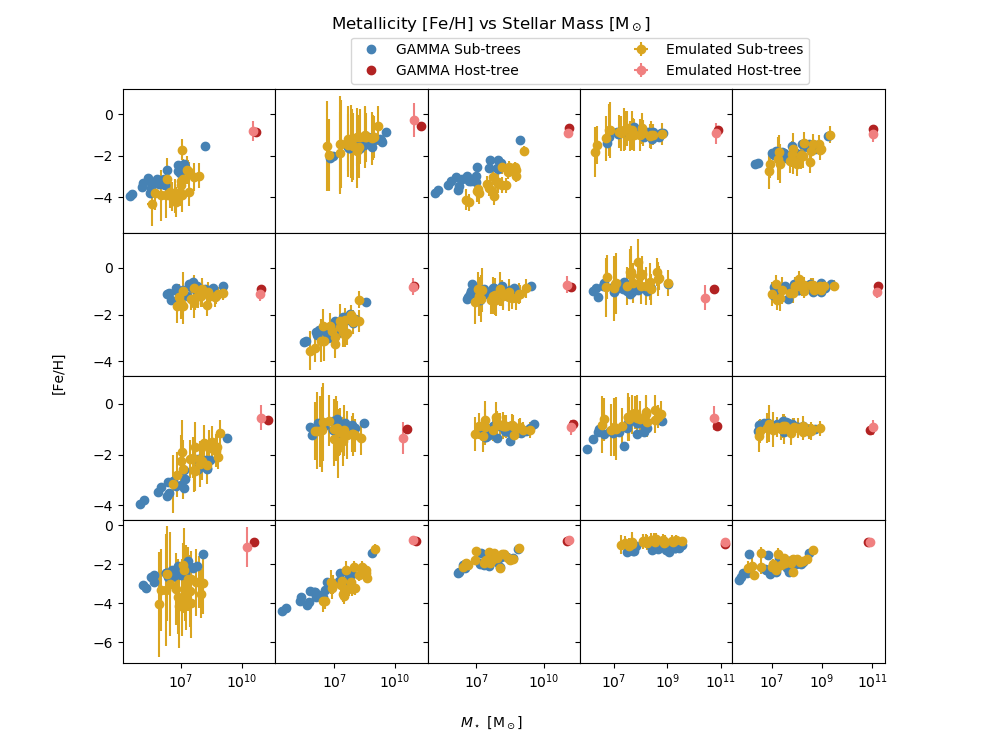

In [76]:
#%matplotlib nbagg

mean = em_FeH_mean_pred_std
Mstar = em_Mstar_pred_std

#print(mean[0].shape)

j = 0
fig, ax = plt.subplots(4, 5, sharex='col', sharey='row')
for i in range(4):
    for k in range(5):
        ax[i, k].errorbar(gal_Mstar_test[j][:-1], gal_FeH_mean_test[j][:-1], fmt='o',color ='steelblue', label='GAMMA Sub-trees')
        ax[i, k].errorbar(gal_Mstar_test[j][-1], gal_FeH_mean_test[j][-1], fmt='o', color = 'firebrick',label='GAMMA Host-tree')
        ax[i, k].errorbar(em_Mstar_pred[j][:-1], em_FeH_mean_pred[j][:-1], xerr = 1.96*Mstar[j][:-1], yerr=1.96*mean[j][:-1], fmt='o', color = 'goldenrod', label='Emulated Sub-trees')
        ax[i, k].errorbar(em_Mstar_pred[j][-1], em_FeH_mean_pred[j][-1], xerr = 1.96*Mstar[j][-1], yerr=1.96*mean[j][-1], fmt='o', color = 'lightcoral', label='Emulated Host-tree')
        ax[i, k].set_xscale('log')
        j += 1


plt.legend(loc='right')
#plt.xscale('log')
fig.text(0.5, 0.03, '$M_\star$ [M$_\odot$]', ha='center', va='center')
fig.text(0.06, 0.5, '[Fe/H]', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace = 0)
fig.suptitle('Metallicity [Fe/H] vs Stellar Mass [M$_\odot$]')
plt.legend(bbox_to_anchor=(-2.5,4.04,3,1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

In [ ]:
print(em_Mstar_pred[0,:])

<IPython.core.display.Javascript object>


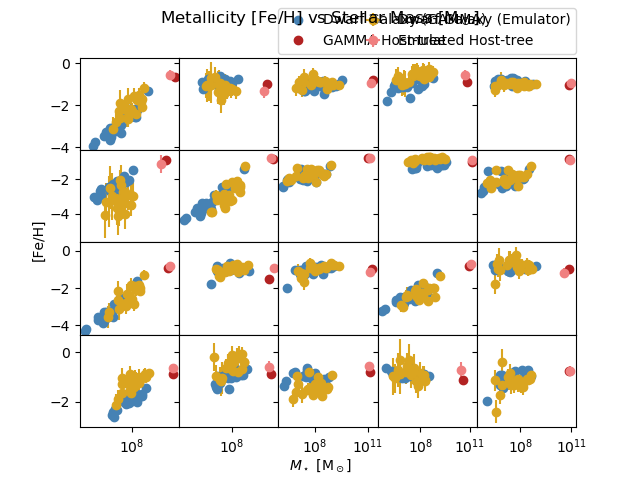

In [10]:
#%matplotlib nbagg

j = 10
fig, ax = plt.subplots(4, 5, sharex='col', sharey='row')
for i in range(4):
    for k in range(5):
        ax[i, k].errorbar(gal_Mstar_test[j][:-1], gal_FeH_mean_test[j][:-1], fmt='o',color ='steelblue', label='Dwarf Galaxy (GAMMA)')
        ax[i, k].errorbar(gal_Mstar_test[j][-1], gal_FeH_mean_test[j][-1], fmt='o', color = 'firebrick',label='GAMMA Host-tree')
        ax[i, k].errorbar(em_Mstar_pred[j][:-1], em_FeH_mean_pred[j][:-1], xerr = Mstar[j][:-1], yerr=mean[j][:-1], fmt='o', color = 'goldenrod', label='Dwarf Galaxy (Emulator)')
        ax[i, k].errorbar(em_Mstar_pred[j][-1], em_FeH_mean_pred[j][-1], xerr = Mstar[j][-1], yerr=mean[j][-1], fmt='o', color = 'lightcoral', label='Emulated Host-tree')
        ax[i, k].set_xscale('log')
        j += 1


plt.legend(loc='right')
#plt.xscale('log')
fig.text(0.5, 0.03, '$M_\star$ [M$_\odot$]', ha='center', va='center')
fig.text(0.06, 0.5, '[Fe/H]', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace = 0)
fig.suptitle('Metallicity [Fe/H] vs Stellar Mass [M$_\odot$]', x=.5, y=.98)
plt.legend(bbox_to_anchor=(-2,4.04,3,1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

<IPython.core.display.Javascript object>


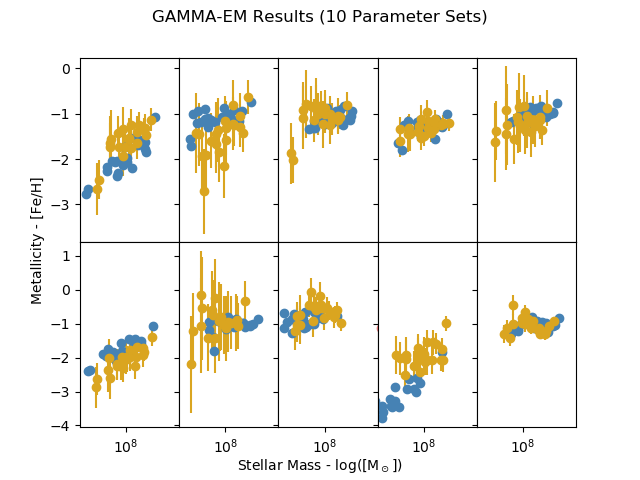

In [11]:
#%matplotlib nbagg

j = 40
fig, ax = plt.subplots(2, 5, sharex='col', sharey='row')
for i in range(2):
    for k in range(5):
        ax[i, k].errorbar(gal_Mstar_test[j][:-1], gal_FeH_mean_test[j][:-1], fmt='o',color ='steelblue', label='Dwarf Galaxy (GAMMA)')
        ax[i, k].errorbar(gal_Mstar_test[j][-1], gal_FeH_mean_test[j][-1], fmt='o', color = 'firebrick',label='GAMMA Host-tree')
        ax[i, k].errorbar(em_Mstar_pred[j][:-1], em_FeH_mean_pred[j][:-1], xerr = Mstar[j][:-1], yerr=mean[j][:-1], fmt='o', color = 'goldenrod', label='Galaxy (Emulated)')
        ax[i, k].errorbar(em_Mstar_pred[j][-1], em_FeH_mean_pred[j][-1], xerr = Mstar[j][-1], yerr=mean[j][-1], fmt='o', color = 'lightcoral', label='Emulated Host-tree')
        ax[i, k].set_xscale('log')
        ax[i, k].set_xlim([7e5,3*10e9])
        
        j += 1


plt.legend(loc='best')
#plt.xscale('log')
fig.text(0.5, 0.03, 'Stellar Mass - log([M$_\odot$])', ha='center', va='center')
fig.text(0.06, 0.5, 'Metallicity - [Fe/H]', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace = 0)
fig.suptitle('GAMMA-EM Results (10 Parameter Sets)')
plt.legend(bbox_to_anchor=(-2,4.04,3,1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

<IPython.core.display.Javascript object>


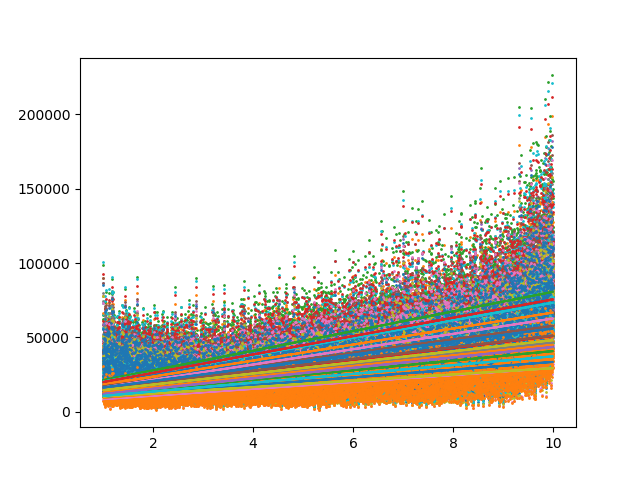

In [153]:
%matplotlib notebook

#standard deviation exploration

em_combo_std = em_FeH_mean_pred_std * em_Mstar_pred_std

from scipy import stats
j = 1
for i in range(len(em_FeH_mean_pred_std[0])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(emsp_test[:,j],em_combo_std[:,i])
    line = slope*emsp_test[:,j]+intercept
    plt.plot(emsp_test[:,j], line)
    plt.scatter(emsp_test[:,j],em_combo_std[:,i], s=1)

<IPython.core.display.Javascript object>


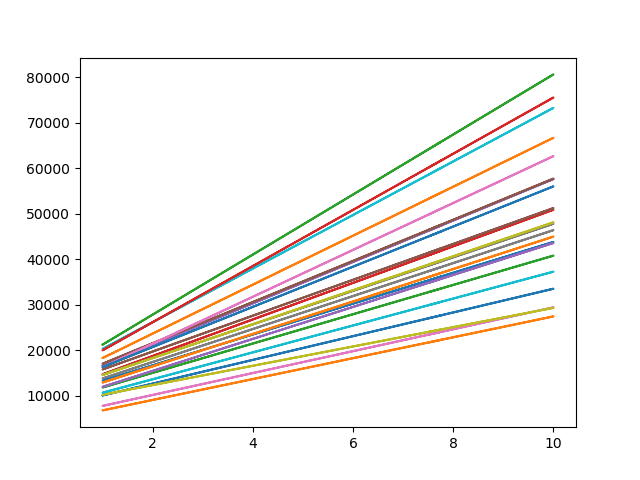

In [154]:
%matplotlib notebook

#standard deviation exploration

em_combo_std_2 = em_FeH_mean_pred_std_2 * em_Mstar_pred_std_2

from scipy import stats
j = 1
for i in range(len(em_FeH_mean_pred_std_2[0])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(emsp_test[:,j],em_combo_std[:,i])
    line = slope*emsp_test[:,j]+intercept
    plt.plot(emsp_test[:,j], line)
    #plt.scatter(emsp_test_2[:,1],em_combo_std_2[:,i], s=1)

## 2nd generation of emulator

In [10]:
sigma_train = np.zeros(len(gal_Mstar_train[0])) 
em_Mstar = []
log_em_Mstar_pred = np.zeros([len(gal_Mstar_test),len(gal_Mstar_test[0])])
log_em_Mstar_pred_std = np.zeros([len(gal_Mstar_test),len(gal_Mstar_test[0])])
log_gal_Mstar_train = np.log10(gal_Mstar_train)

#Stellar mass emulators
for i in range(len(gal_Mstar_train[0])):
    sigma_train[i] = np.log10(np.std(gal_Mstar_train[:,i]))
    #print(sigma_train[i])
    kern = C(sigma_train[i]**2) * RBF() * Matern() + WhiteKernel() 
    em_Mstar.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_Mstar[i].fit(emsp_train,log_gal_Mstar_train[:,i])
    log_em_Mstar_pred[:,i], log_em_Mstar_pred_std[:,i] = em_Mstar[i].predict(emsp_test, return_std = True)


In [11]:
sigma_train = np.zeros(len(gal_FeH_mean_train[0]))
em_FeH_mean = []
em_FeH_mean_pred = np.zeros([len(gal_FeH_mean_test),len(gal_FeH_mean_test[0])])
em_FeH_mean_pred_std = np.zeros([len(gal_FeH_mean_test),len(gal_FeH_mean_test[0])])
#print(gal_FeH_mean_train[:,i].shape)

#Metallicity emulators                          
for i in range(len(gal_FeH_mean_train[0])):
    sigma_train[i] = np.std(gal_FeH_mean_train[:,i])
    #print(sigma_train[i])
    kern = C(sigma_train[i]**2) * RBF() * PairwiseKernel()
    em_FeH_mean.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_FeH_mean[i].fit(emsp_train,gal_FeH_mean_train[:,i])
    em_FeH_mean_pred[:,i], em_FeH_mean_pred_std[:,i] = em_FeH_mean[i].predict(emsp_test, return_std = True)

In [14]:
em_combo_std = log_em_Mstar_pred_std*em_FeH_mean_pred_std

var_index = np.arange(0, 10000, 1).reshape(10000,1)
indexed_combo_std = np.append(em_combo_std, var_index, axis = 1)
indexed_emsp = np.append(emsp_test, var_index, axis = 1)

In [15]:
print(em_FeH_mean_pred_std)

[[0.25722116 0.50538029 0.62118802 ... 0.28965457 0.41435596 0.24210647]
 [0.55854804 1.0033131  1.17235745 ... 0.60225611 0.87534724 0.41496038]
 [0.14169544 0.24207718 0.27809039 ... 0.14856651 0.21796064 0.09696668]
 ...
 [0.36562038 0.68246518 0.81736564 ... 0.40133322 0.57943068 0.3054097 ]
 [0.32073755 0.55427617 0.63573928 ... 0.33897648 0.49613724 0.21760491]
 [0.24926923 0.46424529 0.5556483  ... 0.27324711 0.39466894 0.20749591]]


In [16]:
%matplotlib notebook

top_index = np.zeros([22, 75])

for i in range(len(indexed_combo_std[0])-1):
    x = indexed_combo_std[indexed_combo_std[:,i].argsort()] #sorts the given column 
    top_index[i] = x[-75:,-1].T #gets the largest combined std dev in each column
        
#print(top_index)
top, counts = np.unique(top_index, return_counts=True) #top is the array of the row index of emsp_test points that need to be added to the emulator
print(top)

[ 179.  472.  513.  571.  591.  923.  970.  994. 1194. 1285. 1369. 1462.
 1547. 1567. 1743. 1783. 1910. 1962. 1969. 2246. 2297. 2403. 2669. 2691.
 2735. 2763. 3175. 3418. 3684. 3821. 3844. 3846. 4018. 4442. 4473. 4510.
 4629. 4782. 4910. 4948. 4963. 5062. 5065. 5967. 6026. 6055. 6439. 6529.
 6604. 6700. 6710. 6734. 6883. 6992. 7034. 7112. 7122. 7233. 7241. 7269.
 7499. 7530. 7573. 7574. 7749. 7751. 7777. 7873. 7934. 8012. 8222. 8275.
 8312. 8315. 8558. 8697. 8792. 9029. 9096. 9131. 9151. 9207. 9401. 9517.
 9904. 9926.]


In [17]:
emsp_train_adds = np.zeros([len(top), len(emsp_test[0])]) #points to add to the training data
gal_Mstar_train_adds = np.zeros([len(top), len(gal_Mstar_test[0])])
gal_FeH_mean_train_adds = np.zeros([len(top), len(gal_FeH_mean_test[0])])
                                 
for i in range(len(top)):
    index = int(top[i])
    #print(index)
    emsp_train_adds[i] = emsp_test[index]
    gal_Mstar_train_adds[i] = gal_Mstar_test[index]
    gal_FeH_mean_train_adds[i] = gal_FeH_mean_test[index]
print(emsp_train_adds.shape)

(86, 10)


In [18]:
#add training points
emsp_train_2 = np.append(emsp_train, emsp_train_adds, axis = 0)
gal_Mstar_train_2 = np.append(gal_Mstar_train, gal_Mstar_train_adds, axis = 0)
gal_FeH_mean_train_2 = np.append(gal_FeH_mean_train, gal_FeH_mean_train_adds, axis = 0)
print(emsp_train_2.shape)
print(gal_Mstar_train_2.shape)
print(gal_FeH_mean_train_2.shape)

#import new test points
emsp_test_2 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\em_sample_points10000_2.npy") #set of sample parameter
#load in output testing data
gal_Mstar_test_2 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_Mstar_10000_2.npy")
gal_FeH_mean_test_2 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_mean_10000_2.npy")
gal_FeH_std_test_2 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_std_10000_2.npy")

(286, 10)
(286, 22)
(286, 22)


<IPython.core.display.Javascript object>


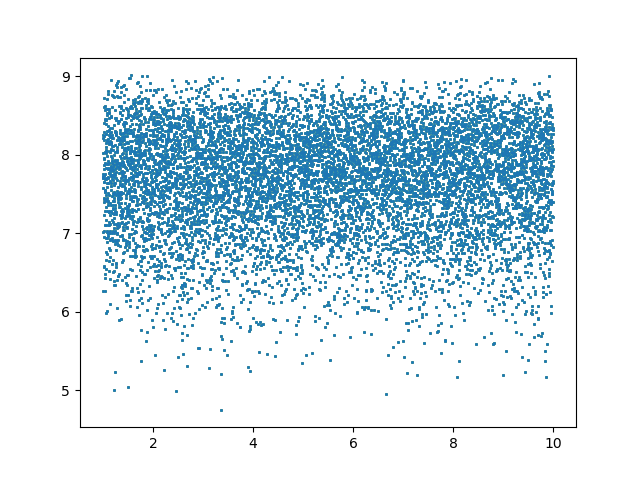

In [446]:
%matplotlib notebook
residuals_Mstar = gal_Mstar_test_2 - em_Mstar_pred
for i in range(len(em_Mstar_pred_std[0])-1):
    plt.scatter(emsp_test[:,1],np.log10(gal_Mstar_test_2[:,5]), s=1)

In [24]:
#for comparison - 30 seconds for 10000
for i in range(len(gal_Mstar_train[0])):
    log_em_Mstar_pred[:,i], log_em_Mstar_pred_std[:,i] = em_Mstar[i].predict(emsp_test_2, return_std = True)
    
for i in range(len(gal_FeH_mean_train[0])):
    em_FeH_mean_pred[:,i], em_FeH_mean_pred_std[:,i] = em_FeH_mean[i].predict(emsp_test_2, return_std = True)

In [25]:
sigma_train_2 = np.zeros(len(gal_Mstar_train_2[0])) 
em_Mstar_2 = []
log_em_Mstar_pred_2 = np.zeros([len(gal_Mstar_test_2),len(gal_Mstar_test_2[0])])
log_em_Mstar_pred_std_2 = np.zeros([len(gal_Mstar_test_2),len(gal_Mstar_test_2[0])])
log_gal_Mstar_train_2 = np.log10(gal_Mstar_train_2)
#print(log_gal_Mstar_train_2)

#Stellar mass emulators
for i in range(len(gal_Mstar_train_2[0])):
    sigma_train_2[i] = np.log10(np.std(gal_Mstar_train_2[:,i]))
    #print(sigma_train[i])
    kern = C(sigma_train_2[i]**2) * RBF() * Matern() + WhiteKernel()
    em_Mstar_2.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_Mstar_2[i].fit(emsp_train_2,log_gal_Mstar_train_2[:,i])
    log_em_Mstar_pred_2[:,i], log_em_Mstar_pred_std_2[:,i] = em_Mstar_2[i].predict(emsp_test_2, return_std = True)

In [307]:
print(np.power(10,log_em_Mstar_pred_2[:,5]))
print(gal_Mstar_test_2[:,5])

[4.71365027e+07 8.40786709e+07 1.08872590e+08 ... 1.50436918e+07
 3.01439179e+07 4.97806555e+06]
[6.41745839e+07 1.01844673e+08 1.11050241e+08 ... 4.04902241e+06
 3.01820892e+07 2.99627621e+05]


In [26]:
#R^2 check against 1st gen emulator
for i in range(len(gal_Mstar_train_2[0])):
    print("1. Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_Mstar_test_2[:,i], np.power(10,log_em_Mstar_pred[:,i])))+ ", LML:" + str(em_Mstar[i].log_marginal_likelihood())) #Test R^2
    print("2. Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_Mstar_test_2[:,i], np.power(10,log_em_Mstar_pred_2[:,i])))+ ", LML:" + str(em_Mstar_2[i].log_marginal_likelihood())) #Test R^2
    #print("2. Test sample " + str(i) + " : R^2 - "+ str(em_Mstar_2[i].score(emsp_test_2,np.log10(gal_Mstar_test_2[:,i])))+ ", LML:" + str(em_Mstar_2[i].log_marginal_likelihood())) #Test R^2
    #print("Test sample " + str(i) + " : R^2 - " + str(em_Mstar_2[i].score(emsp_test_2, gal_Mstar_test_2[:,i])- em_Mstar[i].score(emsp_test, gal_Mstar_test[:,i])))
    #print("Test sample " + str(i) + " : LML difference (Bayes factor) - " + str(em_Mstar_2[i].log_marginal_likelihood()-em_Mstar[i].log_marginal_likelihood()))

1. Test sample 0 : R^2 - 0.7057552956874424, LML:-50.07864221926093
2. Test sample 0 : R^2 - 0.7608956955046168, LML:-57.49556150267466
1. Test sample 1 : R^2 - 0.6211904509300077, LML:-116.12390189732497
2. Test sample 1 : R^2 - 0.6553079729222174, LML:-148.2680982128845
1. Test sample 2 : R^2 - 0.5589514521538566, LML:-142.86087081068604
2. Test sample 2 : R^2 - 0.614990508286229, LML:-178.99743889528148
1. Test sample 3 : R^2 - 0.656946265761009, LML:-115.8394773041621
2. Test sample 3 : R^2 - 0.7280085108946739, LML:-142.49098159904145
1. Test sample 4 : R^2 - 0.502890125700199, LML:-138.9942698291561
2. Test sample 4 : R^2 - 0.5966734134988196, LML:-175.13632247215978
1. Test sample 5 : R^2 - 0.6199931988708358, LML:-139.80492875498115
2. Test sample 5 : R^2 - 0.638158558900689, LML:-180.19827497102872
1. Test sample 6 : R^2 - 0.7486326800609139, LML:60.9697156547015
2. Test sample 6 : R^2 - 0.8215854864892245, LML:99.21017941748198
1. Test sample 7 : R^2 - 0.49285411076788455, LM

In [434]:
r_2_1 = 0
for i in range((len(gal_Mstar_train_2[0])-1)):
    print("Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_Mstar_test_2[:,i], np.power(10,em_Mstar_pred[:,i])))) #Test R^2
    r_2_1 += r2_score(gal_Mstar_test_2[:,i], np.power(10,em_Mstar_pred[:,i]))

r_2_1 = r_2_1 / (len(gal_Mstar_train_2[0])-1)

r_2_2 = 0
for i in range((len(gal_Mstar_train_2[0])-1)):
    print("Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_Mstar_test_2[:,i], np.power(10,log_em_Mstar_pred_2[:,i])))) #Test R^2
    r_2_2 += r2_score(gal_Mstar_test_2[:,i], np.power(10,log_em_Mstar_pred_2[:,i]))

r_2_2 = r_2_2 / (len(gal_Mstar_train_2[0])-1)

print("R^2 of 1st gen: " + str(r_2_1))
print("R^2 of 2nd gen: " + str(r_2_2))

Test sample 0 : R^2 - 0.7057540450796177
Test sample 1 : R^2 - 0.6211910018943094
Test sample 2 : R^2 - 0.558935524766738
Test sample 3 : R^2 - 0.6569543346996947
Test sample 4 : R^2 - 0.5029048218608654
Test sample 5 : R^2 - 0.6199922447776025
Test sample 6 : R^2 - 0.7486368405276624
Test sample 7 : R^2 - 0.4928452586855675
Test sample 8 : R^2 - 0.6719336622266231
Test sample 9 : R^2 - 0.4829788956651785
Test sample 10 : R^2 - 0.532368375560847
Test sample 11 : R^2 - 0.5696181220200065
Test sample 12 : R^2 - 0.6080093544713745
Test sample 13 : R^2 - 0.43910693010279833
Test sample 14 : R^2 - 0.6269349284008254
Test sample 15 : R^2 - 0.4665240842465195
Test sample 16 : R^2 - 0.6484403678622946
Test sample 17 : R^2 - 0.554870161793752
Test sample 18 : R^2 - 0.5379400903071583
Test sample 19 : R^2 - 0.7128902105447885
Test sample 20 : R^2 - 0.37510403740140463
Test sample 0 : R^2 - 0.7554513092326418
Test sample 1 : R^2 - 0.6547167372545707
Test sample 2 : R^2 - 0.578238183032608
Test sa

In [30]:
sigma_train_2 = np.zeros(len(gal_FeH_mean_train_2[0])) 
em_FeH_mean_2 = []
em_FeH_mean_pred_2 = np.zeros([len(gal_FeH_mean_test_2),len(gal_FeH_mean_test_2[0])])
em_FeH_mean_pred_std_2 = np.zeros([len(gal_FeH_mean_test_2),len(gal_FeH_mean_test_2[0])])

#Stellar mass emulators
for i in range(len(gal_FeH_mean_train_2[0])):
    sigma_train_2[i] = np.std(gal_FeH_mean_train_2[:,i])
    #print(sigma_train[i])
    kern = C(sigma_train_2[i]**2) * RBF() * PairwiseKernel()
    em_FeH_mean_2.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_FeH_mean_2[i].fit(emsp_train_2,gal_FeH_mean_train_2[:,i])
    em_FeH_mean_pred_2[:,i], em_FeH_mean_pred_std_2[:,i] = em_FeH_mean_2[i].predict(emsp_test_2, return_std = True)

In [ ]:
#R^2 check against 1st gen emulator
#for i in range(len(gal_FeH_mean_train_2[0])):
    #print("1. Test sample " + str(i) + " : R^2 - "+ str(em_FeH_mean[i].score(emsp_test, gal_FeH_mean_test[:,i]))+ ", LML:" + str(em_FeH_mean[i].log_marginal_likelihood())) #Test R^2
    #print("2. Test sample " + str(i) + " : R^2 - "+ str(em_FeH_mean_2[i].score(emsp_test_2, gal_FeH_mean_test_2[:,i]))+ ", LML:" + str(em_FeH_mean_2[i].log_marginal_likelihood())) #Test R^2
    #print("Test sample " + str(i) + " : R^2 - " + str(em_FeH_mean_2[i].score(emsp_test_2, gal_FeH_mean_test_2[:,i])- em_FeH_mean[i].score(emsp_test_2, gal_FeH_mean_test_2[:,i])))
    #print("Test sample " + str(i) + " : LML difference (Bayes factor) - " + str(em_FeH_mean[i].log_marginal_likelihood()-em_FeH_mean_2[i].log_marginal_likelihood()))
    
r_2_1 = 0
for i in range((len(gal_FeH_mean_train_2[0])-1)):
    print("Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_FeH_mean_test_2[:,i], em_FeH_mean_pred[:,i]))) #Test R^2
    r_2_1 += r2_score(gal_FeH_mean_test_2[:,i], em_FeH_mean_pred[:,i])

r_2_1 = r_2_1 / (len(gal_FeH_mean_train_2[0])-1)

r_2_2 = 0
for i in range((len(gal_FeH_mean_train_2[0])-1)):
    print("Test sample " + str(i) + " : R^2 - "+ str(r2_score(gal_FeH_mean_test_2[:,i], em_FeH_mean_pred_2[:,i]))) #Test R^2
    r_2_2 += r2_score(gal_FeH_mean_test_2[:,i], em_FeH_mean_pred_2[:,i])
r_2_2 = r_2_2 / (len(gal_FeH_mean_train_2[0])-1)

print("R^2 of 1st gen: " + str(r_2_1))
print("R^2 of 2nd gen: " + str(r_2_2))

<IPython.core.display.Javascript object>


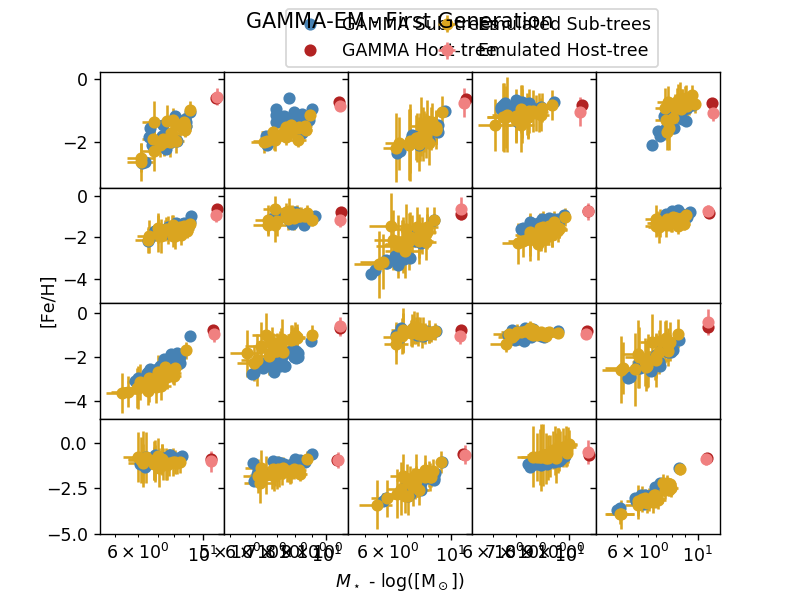

In [28]:
#1st gen plot

j = 0
fig, ax = plt.subplots(4, 5, sharex='col', sharey='row')
for i in range(4):
    for k in range(5):
        ax[i, k].errorbar(np.log10(gal_Mstar_test_2[j][:-1]), gal_FeH_mean_test_2[j][:-1], fmt='o',color ='steelblue', label='GAMMA Sub-trees')
        ax[i, k].errorbar(np.log10(gal_Mstar_test_2[j][-1]), gal_FeH_mean_test_2[j][-1], fmt='o', color = 'firebrick',label='GAMMA Host-tree')
        ax[i, k].errorbar(log_em_Mstar_pred[j][:-1], em_FeH_mean_pred[j][:-1], xerr = 1.96*log_em_Mstar_pred_std[j][:-1], yerr=1.96*em_FeH_mean_pred_std[j][:-1], fmt='o', color = 'goldenrod', label='Emulated Sub-trees')
        ax[i, k].errorbar(log_em_Mstar_pred[j][-1], em_FeH_mean_pred[j][-1], xerr = 1.96*log_em_Mstar_pred_std[j][-1], yerr=1.96*em_FeH_mean_pred_std[j][-1], fmt='o', color = 'lightcoral', label='Emulated Host-tree')
        ax[i, k].set_xscale('log')
        j += 1


plt.legend(loc='right')
#plt.xscale('log')
fig.text(0.5, 0.03, '$M_\star$ - log([M$_\odot$])', ha='center', va='center')
fig.text(0.06, 0.5, '[Fe/H]', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace = 0)
fig.suptitle('GAMMA-EM - First Generation')
plt.legend(bbox_to_anchor=(-2.5,4.04,3,1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

In [383]:
print(np.power(10,log_em_Mstar_pred_2[j]))

[3.04883841e+08 3.59094213e+06 2.52400677e+06 1.01426257e+07
 9.05033851e+06 1.98970502e+07 1.27712301e+09 5.44552090e+07
 2.77618161e+08 3.35797791e+05 2.95125133e+07 1.18370761e+08
 2.80712773e+08 2.54664911e+06 6.47674898e+07 8.79036031e+06
 2.33174783e+07 7.06414421e+06 2.85885473e+07 1.75115741e+08
 4.87025416e+05 1.79804785e+11]


<IPython.core.display.Javascript object>


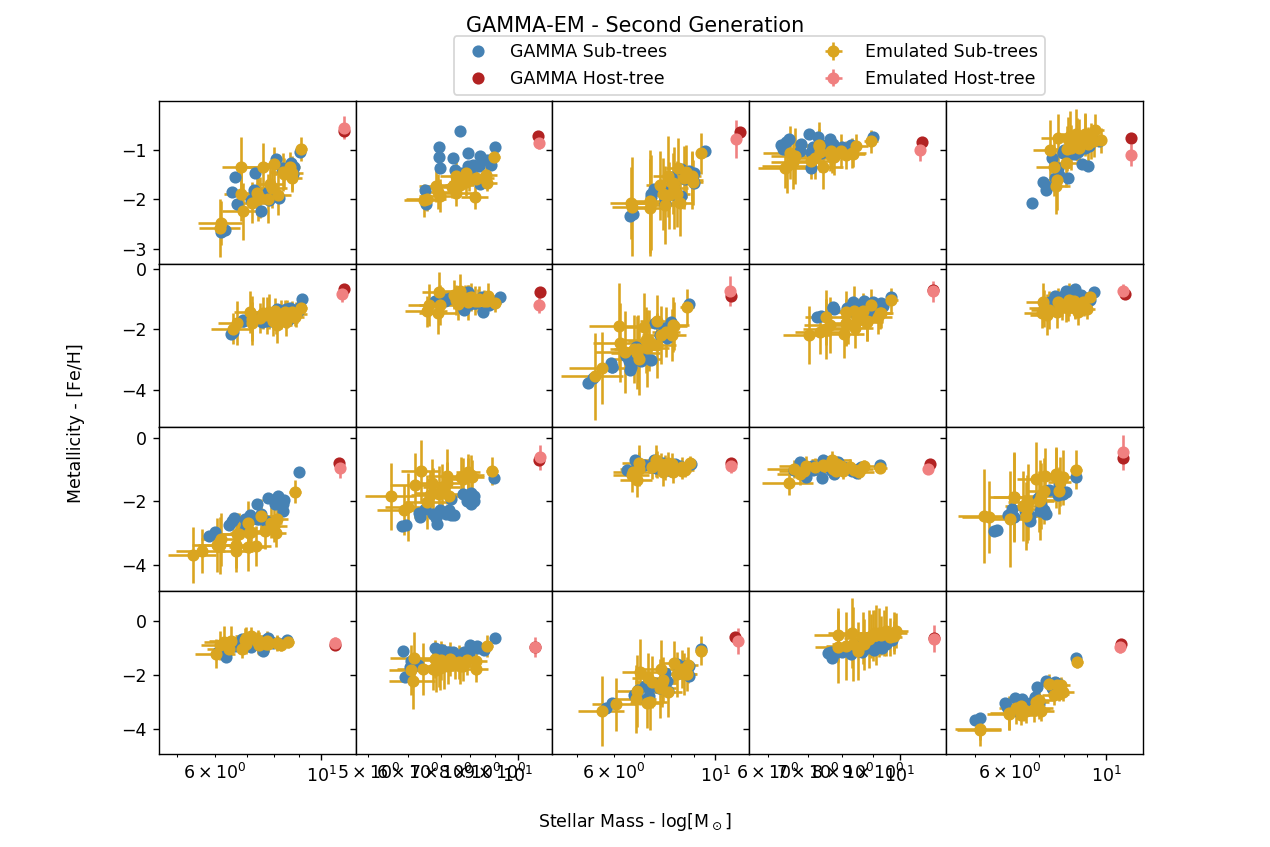

In [34]:
#2nd Gen plot
j = 0
fig, ax = plt.subplots(4, 5, sharex='col', sharey='row')
for i in range(4):
    for k in range(5):
        ax[i, k].errorbar(np.log10(gal_Mstar_test_2[j][:-1]), gal_FeH_mean_test_2[j][:-1], fmt='o',color ='steelblue', label='GAMMA Sub-trees')
        ax[i, k].errorbar(np.log10(gal_Mstar_test_2[j][-1]), gal_FeH_mean_test_2[j][-1], fmt='o', color = 'firebrick',label='GAMMA Host-tree')
        ax[i, k].errorbar(log_em_Mstar_pred_2[j][:-1], em_FeH_mean_pred_2[j][:-1], xerr = 1.96*log_em_Mstar_pred_std_2[j][:-1], yerr=1.96*em_FeH_mean_pred_std_2[j][:-1], fmt='o', color = 'goldenrod', label='Emulated Sub-trees')
        ax[i, k].errorbar(log_em_Mstar_pred_2[j][-1], em_FeH_mean_pred_2[j][-1], xerr = 1.96*log_em_Mstar_pred_std_2[j][-1], yerr=1.96*em_FeH_mean_pred_std_2[j][-1], fmt='o', color = 'lightcoral', label='Emulated Host-tree')
        ax[i, k].set_xscale('log')
        j += 1


plt.legend(loc='right')
#plt.xscale('log')
fig.text(0.5, 0.03, 'Stellar Mass - log[M$_\odot$]', ha='center', va='center')
fig.text(0.06, 0.5, 'Metallicity - [Fe/H]', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace = 0)
fig.suptitle('GAMMA-EM - Second Generation')
plt.legend(bbox_to_anchor=(-2.5,4.04,3,1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

## 3rd generation of emulator

In [ ]:
em_combo_std = log_em_Mstar_pred_std_2*em_FeH_mean_pred_std_2 #combined standard deviation, equally weighted between outputs

var_index = np.arange(0, 10000, 1).reshape(10000,1) #index count of the sample
indexed_combo_std = np.append(em_combo_std, var_index, axis = 1) #puts an in-array index of standard deviation results matching each sample parameter set
indexed_emsp = np.append(emsp_test_2, var_index, axis = 1) #puts an in-array index of each sample parameter set

top_index = np.zeros([22, 75]) #creates an array to be filled with the set of indexes that are associated with the 75 highest standard deviations in the test sample set

for i in range(len(indexed_combo_std[0])-1):
    x = indexed_combo_std[indexed_combo_std[:,i].argsort()] #sorts the given column 
    top_index[i] = x[-75:,-1].T #gets the largest combined std dev in each column
        
top, counts = np.unique(top_index, return_counts=True) #top is the array of the row index of emsp_test points that need to be added to the emulator

#points to add to the training data
emsp_train_adds = np.zeros([len(top), len(emsp_test_2[0])]) 
gal_Mstar_train_adds = np.zeros([len(top), len(gal_Mstar_test_2[0])])
gal_FeH_mean_train_adds = np.zeros([len(top), len(gal_FeH_mean_test_2[0])])

#selecting the training data from the original test set
for i in range(len(top)):
    index = int(top[i])
    emsp_train_adds[i] = emsp_test_2[index]
    gal_Mstar_train_adds[i] = gal_Mstar_test_2[index]
    gal_FeH_mean_train_adds[i] = gal_FeH_mean_test_2[index]

#add training points
emsp_train_3 = np.append(emsp_train_2, emsp_train_adds, axis = 0)
gal_Mstar_train_3 = np.append(gal_Mstar_train_2, gal_Mstar_train_adds, axis = 0)
gal_FeH_mean_train_3 = np.append(gal_FeH_mean_train_2, gal_FeH_mean_train_adds, axis = 0)

In [ ]:
#import new set of test points
emsp_test_3 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\em_sample_points10000_3.npy")
gal_Mstar_test_3 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_Mstar_10000_3.npy")
gal_FeH_mean_test_3 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_mean_10000_3.npy")
gal_FeH_std_test_3 = np.load(r"C:\Users\carli\Documents\Astrophysics General\iCER ACRES\GAMMA-EM\sample_sets\gal_FeH_std_10000_3.npy")

In [ ]:
sigma_train_2 = np.zeros(len(gal_Mstar_train_2[0])) 
em_Mstar_2 = []
log_em_Mstar_pred_2 = np.zeros([len(gal_Mstar_test_2),len(gal_Mstar_test_2[0])])
log_em_Mstar_pred_std_2 = np.zeros([len(gal_Mstar_test_2),len(gal_Mstar_test_2[0])])
log_gal_Mstar_train_2 = np.log10(gal_Mstar_train_2)
#print(log_gal_Mstar_train_2)

#Stellar mass emulators
for i in range(len(gal_Mstar_train_2[0])):
    sigma_train_2[i] = np.log10(np.std(gal_Mstar_train_2[:,i]))
    #print(sigma_train[i])
    kern = C(sigma_train_2[i]**2) * RBF() * Matern() + WhiteKernel()
    em_Mstar_2.append(GaussianProcessRegressor(kernel=kern, n_restarts_optimizer=1))
    em_Mstar_2[i].fit(emsp_train_2,log_gal_Mstar_train_2[:,i])
    log_em_Mstar_pred_2[:,i], log_em_Mstar_pred_std_2[:,i] = em_Mstar_2[i].predict(emsp_test_2, return_std = True)